In [6]:
import msvm
import time
import numpy as np
import matplotlib.pyplot as plt

def generate_lin_toy(point_num: int):
    x  = 6 * np.random.rand(point_num, 2) - 3
    y1 = x[:, 0] + x[:, 1] <  0.6
    y2 = x[:, 0] + x[:, 1] >= 1.2
    x1 = x[y1]
    x2 = x[y2]
    y = np.hstack((y1[y1 == 1]+1, y2[y2 == 1]))
    x = np.vstack((x1, x2))
    return x, y

def generate_ker_toy(point_num: int):
    x  = 6 * np.random.rand(point_num, 2) - 3
    y1 = x[:, 0]*x[:, 0] + x[:, 1]*x[:, 1] <  4
    y2 = x[:, 0]*x[:, 0] + x[:, 1]*x[:, 1] >= 5.5
    x1 = x[y1]
    x2 = x[y2]
    y = np.hstack((y1[y1 == 1]+1, y2[y2 == 1]))
    x = np.vstack((x1, x2))
    return x, y

In [7]:
x, y = generate_lin_toy(250)
svm  = msvm.BinarySVM()
t_start = time.time()
svm.bsvm_train(x, y, epsilon=1e-8)
pred, _, acc = svm.bsvm_pred(x, y)
t_end = time.time()

t = t_end - t_start
print(f"Elapsed time is {t} secs.")
print(f"accuracy: {acc}%")

Elapsed time is 0.02093958854675293 secs.
accuracy: 100.0%


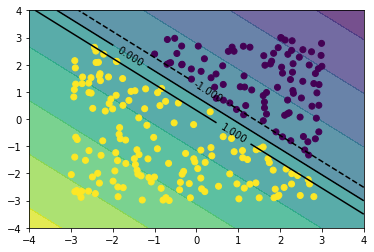

In [8]:
step = 100
xx = np.linspace(-4, 4, step)
yy = np.linspace(-4, 4, step)
xx, yy = np.meshgrid(xx, yy)
gx = np.vstack((np.ravel(xx), np.ravel(yy)))
zz, _, _ = svm.bsvm_pred(gx.T, np.ones(step*step))
zz = zz.reshape((step, step))

plt.contourf(xx, yy, zz, 8, alpha=0.75, cmap=None)
c = plt.contour(xx, yy, zz, [-1, 0, 1], colors="k")
plt.clabel(c)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()


In [9]:
x, y = generate_ker_toy(250)
t_start = time.time()
svm  = msvm.BinarySVM(kernel="poly", d=2)
svm.bsvm_train(x, y)
_, _, acc = svm.bsvm_pred(x, y)
t_end = time.time()

t = t_end - t_start
print(f"Elapsed time is {t} secs.")
print(f"accuracy: {acc}%")

Elapsed time is 0.03191423416137695 secs.
accuracy: 100.0%


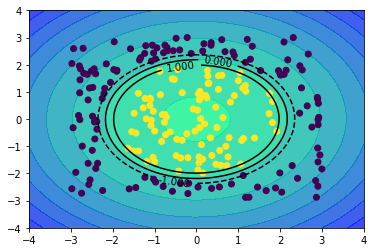

In [10]:
step = 100
xx = np.linspace(-4, 4, step)
yy = np.linspace(-4, 4, step)
xx, yy = np.meshgrid(xx, yy)
gx = np.vstack((np.ravel(xx), np.ravel(yy)))
zz, _, _ = svm.bsvm_pred(gx.T, np.ones(step*step))
zz = zz.reshape((step, step))

plt.contourf(xx, yy, zz, 8, alpha=0.75, cmap=plt.cm.winter)
c = plt.contour(xx, yy, zz, [-1, 0, 1], colors="k")
plt.clabel(c)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()